# Testing energy response of the FOXSISIM

In [1]:
from foxsisim.module import Module
from foxsisim.detector import Detector
from foxsisim.source import Source
from foxsisim.plotting import plot,scatterHist
import matplotlib.pyplot as plt
import numpy as np

### Defining Spectrum
spectrum returns 1/max_energy for the range [0,max_energy], otherwise return zero.

In [2]:
max_energy = 30.0
def spectrum(z):
        if (type(z) is not type([1])) and (type(z) is not type(np.array(1))):
            x = np.array([z])
        else:
            x = np.array(z)
        return np.piecewise(x, [x < 0, ((x < max_energy) & (x > 0)), (x >= max_energy)], [0, 1./max_energy, 0])

Now we need to load the spectrum into the ***source*** Module.<br>
**source.loadSpectrum** loads a function, f(energy_keV), as the energy spectrum for the source. <br>
**source._spectrum()** returns the spectrum for a given numpy array.

In [3]:
source_distance = -1e4 ##cm
source = Source(type='point', center=[0, 0, source_distance])
source.loadSpectrum(spectrum)

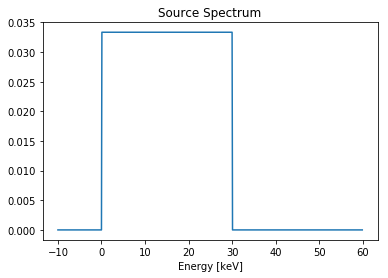

In [4]:
energies = np.arange(-10, 60, 0.1)
plt.plot(energies, source._spectrum(energies))
plt.xlabel('Energy [keV]')
plt.title('Source Spectrum')
plt.show()

### Create a Module, a Detector and Generate Rays

In [5]:
module = Module(radii = [5.151,4.9,4.659,4.429,4.21,4.0,3.799,3.59,3.38,3.17],# 10Shells
                seglen = 30.0,
                base = [0,0,0],
                angles = None
                )

detector = Detector(width=8, 
                    height=8,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])

#  generate 500 rays at source
rays = source.generateRays(module.targetFront, 500)

#### Histogram of rays generated

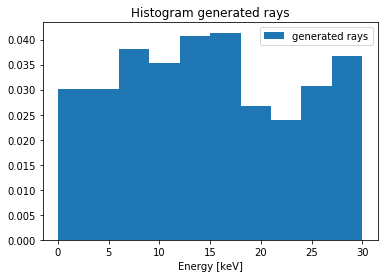

In [6]:
plt.figure()
plt.hist([ray.energy for ray in rays], normed=True, label='generated rays')
plt.xlabel('Energy [keV]')
plt.title('Histogram generated rays')
plt.legend()
plt.show()

### Pass and Catch Rays

In [7]:
from datetime import datetime
tstart = datetime.now()

# pass rays through module
module.passRays(rays, robust=True)
# catch rays at detector
detector.catchRays(rays)


rays_on_detector = len(detector.rays)
print('Number of rays on Detector ' + str(rays_on_detector))
print('Time total: ' + str((datetime.now() - tstart).seconds) + ' seconds')
print('Time per ray (s): ' + str(rays_on_detector / float((datetime.now() - tstart).seconds)))

Number of rays on Detector 36
Time total: 169 seconds
Time per ray (s): 0.21301775147928995


/Users/Kamilobu/Desktop/foxsi-optics-sim/src/foxsisim/detector.py:143: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  colorSum[ypix, xpix, :] += ray.tag.colorAtPoint([ray.src]).astype(int)
/Users/Kamilobu/Desktop/foxsi-optics-sim/src/foxsisim/detector.py:150: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  counts[ypix, xpix] += 1


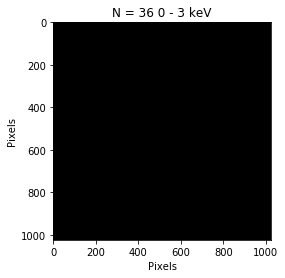

In [8]:
plot(detector, energy_range=[0, 3])
plt.show()

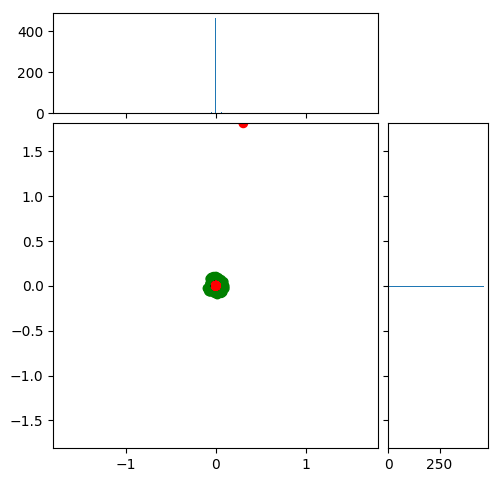

In [9]:
scatterHist(rays)
plt.show()

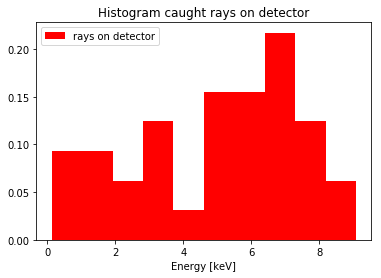

In [10]:
plt.figure()
plt.hist([ray.energy for ray in detector.rays], normed=True, label='rays on detector',color='r')
plt.xlabel('Energy [keV]')
plt.title('Histogram caught rays on detector')
plt.legend()
plt.show()

/Users/Kamilobu/Desktop/foxsi-optics-sim/src/foxsisim/detector.py:143: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  colorSum[ypix, xpix, :] += ray.tag.colorAtPoint([ray.src]).astype(int)
/Users/Kamilobu/Desktop/foxsi-optics-sim/src/foxsisim/detector.py:152: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  counts[ypix, xpix] += 1


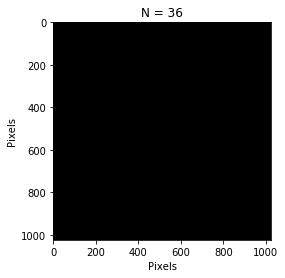

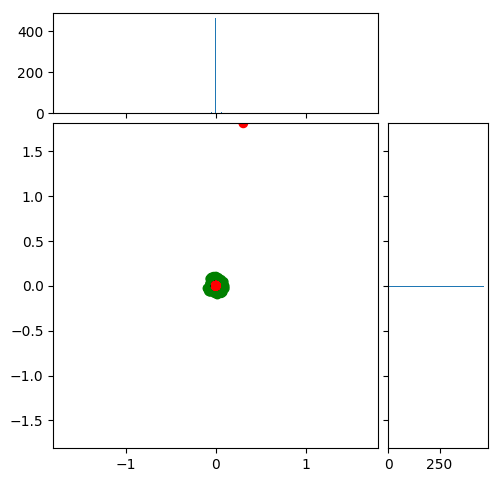

In [11]:
plot(detector)
scatterHist(rays)
plt.show()